# Tyler Reno
K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Business and Data Understanding

The purpose of this project is to analyze data regarding season ticket holders in order to predict which ticket holders are most likely not to renew their season tickets.  Kansas State University is interested in retaining as many season ticket holders as possible, so some insight into this information could be very valuable to them.  They have limited resources to contact their season ticket holders, so being able to identify which ticket holders are most likely not to renew for next year would allow them to focus their resources on those specific individuals and maximize their efficiency. 

The data being analyzed is (supposedly) Kansas State University's existing information on their current season pass holders.  There is quite a bit of missing data and some fields will need to be consolidated, but there appears to be enough useful information to develop a helpful model.

# Data Processing

###### Reading Data

In [126]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


###### Cleaning Data

In [128]:
#Consolidating number of games attended

df['GAMES_ATTENDED'] = df['Y1G1'] + df['Y1G2'] + df['Y1G3'] + df['Y1G4'] + df['Y1G5']
df = df.drop(['Y1G1', 'Y1G2', 'Y1G3', 'Y1G4', 'Y1G5'], axis=1)

In [129]:
#Replacing empty Strings with NaN's

df = df.replace(r'\s+',np.nan,regex=True)
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,GAMES_ATTENDED
0,580V74KT,0,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203,3
1,298S54OK,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68,2
2,268D25AO,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38,2
3,312Q12WV,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68,3
4,420R23VB,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194,1


In [130]:
#Checking for null values

df.isnull().sum()

FAKEID               0
Y2defect             0
Y1price              0
YEARS                0
BACKER               0
AGE               1993
INCOME            1944
CHILD             8634
GNDR               498
OWNHOME           1999
SPORT             4943
COMP              8207
PCTMARR              0
HOMEVAL              0
GAMES_ATTENDED       0
dtype: int64

In [131]:
#Dropping COMP and CHILD because they are mostly null

df = df.drop(['COMP'], axis=1)
df = df.drop(['CHILD'], axis=1)

# Data Visualization

In [132]:
#Viewing general data information

df.describe()

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,GAMES_ATTENDED
count,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,8718.000000,7217.000000,4273.000000,9216.000000,9216.000000,9216.000000
mean,0.500000,19.963108,6.378038,0.489475,61.392912,2.882151,0.447236,0.718581,0.056869,58.228516,112.111220,2.255642
std,0.500027,8.820188,2.873927,0.499916,16.594747,1.843857,0.497237,0.449722,0.250085,12.902173,92.292223,1.054032
min,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.000000,4.000000,0.000000,48.000000,1.000000,0.000000,0.000000,0.000000,52.000000,56.000000,1.000000
50%,0.500000,15.000000,6.000000,0.000000,63.000000,3.000000,0.000000,1.000000,0.000000,61.000000,81.000000,2.000000
75%,1.000000,25.000000,9.000000,1.000000,75.000000,4.000000,1.000000,1.000000,0.000000,67.000000,132.000000,3.000000
max,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,1.000000,3.000000,99.000000,600.000000,5.000000


In [133]:
#Displaying average values for each column for the two possible outcomes of this project.

pd.pivot_table(df,index=["Y2defect"])

,AGE,BACKER,GAMES_ATTENDED,GNDR,HOMEVAL,INCOME,OWNHOME,PCTMARR,SPORT,Y1price,YEARS
Y2defect,,,,,,,,,,,
0,61.831873,0.584418,2.429253,0.443044,109.368273,2.861505,0.728631,58.536458,0.051756,20.170356,6.777778
1,60.943993,0.394531,2.082031,0.451435,114.854167,2.903163,0.708495,57.920573,0.062115,19.755859,5.978299


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000197F25F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000193AF240>]], dtype=object)

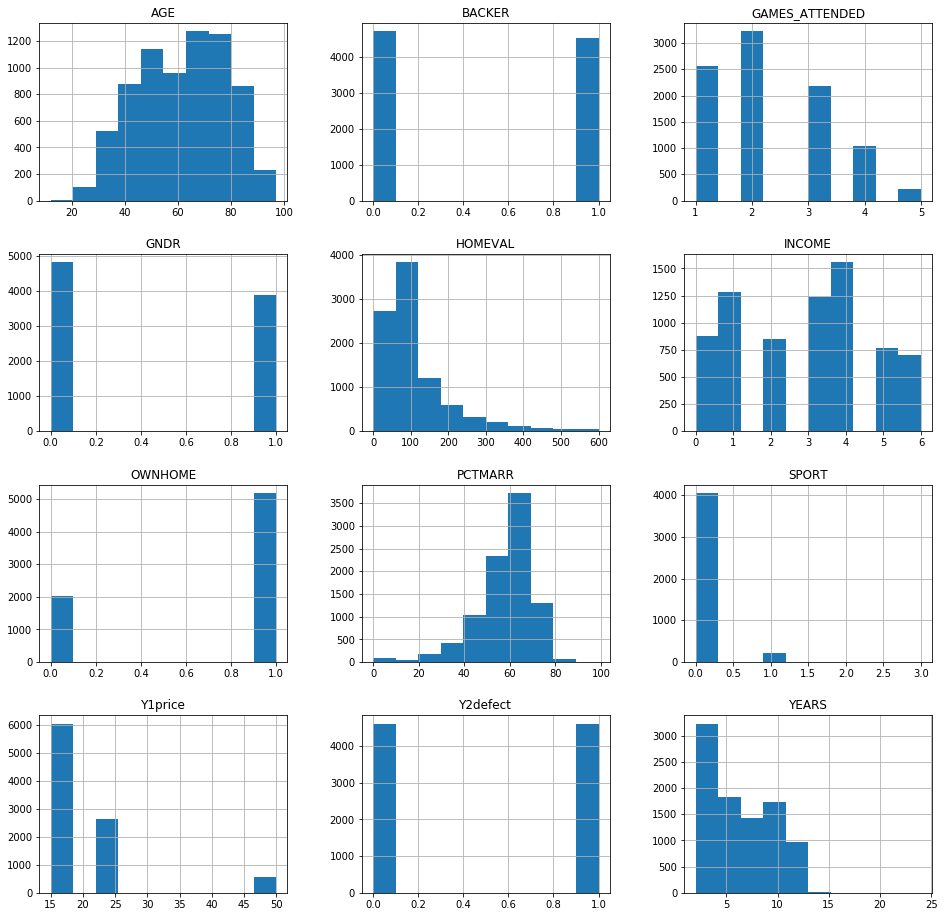

In [134]:
#Displaying value distribution for each factor.

df.hist(figsize=(16,16))

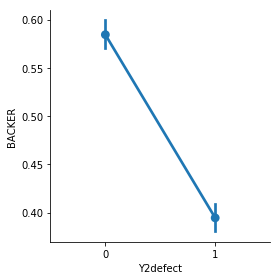

In [135]:
#Examining the relationship between Y2defect and several promising factors.

sns.factorplot("Y2defect", "BACKER", data=df)

##### Backers are far more likely to renew their season tickets than non-backers.

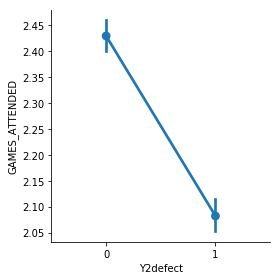

In [136]:
sns.factorplot("Y2defect", "GAMES_ATTENDED", data=df)

##### Those attending more games are far more likely to renew their season tickets.

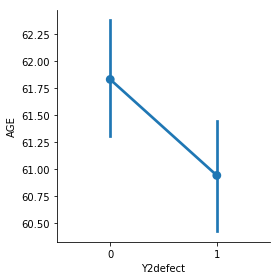

In [137]:
sns.factorplot("Y2defect", "AGE", data=df)

##### Older people are more likely to renew their season tickets.

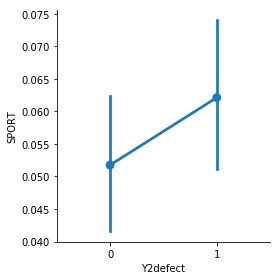

In [138]:
sns.factorplot("Y2defect", "SPORT", data=df)

##### Interestingly, it appears that individuals who subscribe to a sports magazine are less likely to renew their season pass.

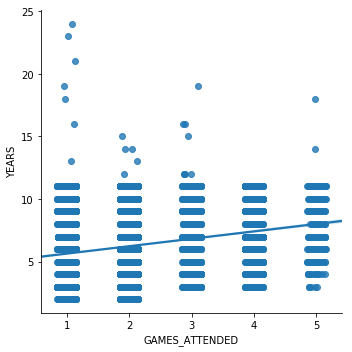

In [139]:
#Checking the relationship between number of games attended and number of years as a season ticket holder

sns.lmplot("GAMES_ATTENDED", "YEARS", df, x_jitter=.15)

##### Those that have been season ticket holders for longer attend slightly more games on average.

# Exploratory Data Analysis

In [140]:
#Looking for trends in correlation

df.corr()

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,GAMES_ATTENDED
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.026752,0.011297,0.008438,-0.022388,0.020711,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,-0.032464,0.080680,0.045249,-0.018029,0.018550,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.323799,-0.100790,-0.013408,-0.011307,-0.049982,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.207643,-0.095961,-0.024022,-0.018135,-0.037559,0.032558,-0.064727,0.220321
AGE,-0.026752,-0.032464,0.323799,0.207643,1.000000,-0.248853,0.021664,-0.085298,-0.048280,-0.060747,-0.016393,0.062522
INCOME,0.011297,0.080680,-0.100790,-0.095961,-0.248853,1.000000,0.073726,0.039431,0.085243,0.160300,0.318180,-0.007348
GNDR,0.008438,0.045249,-0.013408,-0.024022,0.021664,0.073726,1.000000,0.075907,0.054709,0.053926,0.022454,-0.020839
OWNHOME,-0.022388,-0.018029,-0.011307,-0.018135,-0.085298,0.039431,0.075907,1.000000,0.011732,0.100576,-0.029668,0.013050
SPORT,0.020711,0.018550,-0.049982,-0.037559,-0.048280,0.085243,0.054709,0.011732,1.000000,0.029772,0.036767,0.013453
PCTMARR,-0.023869,0.008032,0.023691,0.032558,-0.060747,0.160300,0.053926,0.100576,0.029772,1.000000,0.046570,0.021239


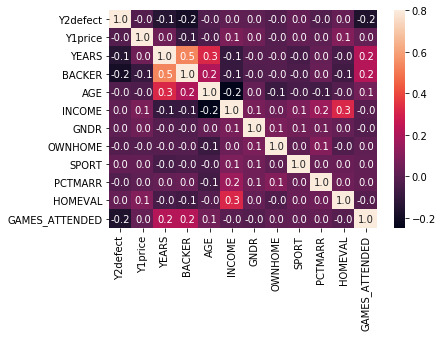

In [141]:
#Heatmap to show correlations

sns.heatmap(df.corr(), vmax=.8, annot=True, fmt=".1f")

### Hypothesis Testing

Hypothesis 1 - I predict that being a backer has a significant impact on whether or not a season ticket holder renews their season pass because if somebody is willing to donate money to KSU they are likely dedicated fans and also have the financial means to renew their pass.  
  
Hypothesis 2 - I predict that the number of years has a significant impact on whether or not a season ticket holder renews their season pass because if they have had a season pass for several years, they might be more likely to continue holding one, as opposed to somebody that's only had a season pass for one year and might not know if it's really worth it to them yet.
  
Hypothesis 3 - I predict that the income level of an individual has a significant impact on whether or not a season ticket holder renews their season pass because somebody with a higher level of income has greater means to renew their season pass.

In [142]:
#Hypothesis 1 test

backer = df[df['BACKER'] == 0]['Y2defect']
not_backer = df[df['BACKER'] == 1]['Y2defect']
result = stats.ttest_ind(backer,not_backer)
print result

Ttest_indResult(statistic=18.569229464586954, pvalue=1.3520712382655212e-75)


##### This t-test indicates that being a backer IS a statistically significant factor in determining whether a season ticket holder will renew their season pass, as the p-value of this test is far below .05.  My hypothesis was correct.

In [143]:
#Hypothesis 2 test

renewed = df[df['Y2defect'] == 0]['YEARS']
not_renewed = df[df['Y2defect'] == 1]['YEARS']
result = stats.ttest_ind(backer,not_backer)
print result

Ttest_indResult(statistic=18.569229464586954, pvalue=1.3520712382655212e-75)


##### This t-test indicates that the number of years IS a statistically significant factor in determining whether a season ticket holder will renew their season pass, as the p-value of this test is far below .05.  My hypothesis was correct.

In [144]:
#Hypothesis 3 test

income_0 = df[df['INCOME'] == 0]['Y2defect']
income_1 = df[df['INCOME'] == 1]['Y2defect']
income_2 = df[df['INCOME'] == 2]['Y2defect']
income_3 = df[df['INCOME'] == 3]['Y2defect']
income_4 = df[df['INCOME'] == 4]['Y2defect']
income_5 = df[df['INCOME'] == 5]['Y2defect']
income_6 = df[df['INCOME'] == 6]['Y2defect']

f_val, p_val = stats.f_oneway(income_0,income_1,income_2,income_3,income_4,income_5,income_6)
print p_val

0.767006588281


##### This ANOVA test indicates that the income of an individual IS NOT a statistically significant factor in determining whether or not a season ticket holder will renew their season pass, as the p-value is greater than .05.  My hypothesis was incorrect.

# Model Building

Classification models will not function with features that contain any missing values (NaN), so I am replacing the NaN's from each column with the average value for that column.  This way the data is not skewed by setting them all equal to 0 or another arbitrary number.

In [145]:
#Calculating mean values

AGE_Mean = df['AGE'].mean()
INCOME_Mean = df['INCOME'].mean()
GNDR_Mean = df['GNDR'].mean()
OWNHOME_Mean = df['OWNHOME'].mean()
SPORT_Mean = df['SPORT'].mean()

#Filling values

values = {'AGE': AGE_Mean, 'INCOME': INCOME_Mean, 'GNDR': GNDR_Mean, 'OWNHOME': OWNHOME_Mean, 'SPORT': SPORT_Mean}
df = df.fillna(value=values)
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,GAMES_ATTENDED
0,580V74KT,0,15,8,1,94.000000,4.000000,0.0,1.0,0.056869,77,203,3
1,298S54OK,1,15,3,1,61.392912,2.882151,0.0,0.0,0.056869,53,68,2
2,268D25AO,1,15,11,1,67.000000,2.000000,0.0,1.0,0.000000,50,38,2
3,312Q12WV,1,15,4,0,62.000000,4.000000,1.0,1.0,0.000000,60,68,3
4,420R23VB,0,15,5,0,89.000000,4.000000,1.0,1.0,0.000000,65,194,1


### Decision Tree

In [146]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID'], axis=1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [148]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [149]:
#Model evaluation & validation

print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.553345388788
--------------------------------------------------------
[[743 620]
 [615 787]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.55      0.55      1363
          1       0.56      0.56      0.56      1402

avg / total       0.55      0.55      0.55      2765

--------------------------------------------------------
0.553230999003


##### This model is not very accurate with an AUC score of ~ 54.6%.

### Knn

In [150]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID'], axis=1)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
#Model evaluation & validation

print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.514285714286
--------------------------------------------------------
[[736 627]
 [716 686]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.54      0.52      1363
          1       0.52      0.49      0.51      1402

avg / total       0.51      0.51      0.51      2765

--------------------------------------------------------
0.51464316253


##### This model is even less accurate with an AUC score of ~ 51.4%.

### Logistic Regression

In [153]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID'], axis=1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
#Model evaluation and validation

print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.589511754069
[[831 532]
 [603 799]]
             precision    recall  f1-score   support

          0       0.58      0.61      0.59      1363
          1       0.60      0.57      0.58      1402

avg / total       0.59      0.59      0.59      2765

0.589792331048


##### This model is more accurate with an AUC score of ~ 59%.

### Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID'], axis=1)

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.99750434027777779

In [157]:
#Model evaluation and validation

print metrics.accuracy_score(y, clf.predict(X))
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))
print metrics.roc_auc_score(y_test, clf.predict(X_test))

0.997504340278
[[4599    9]
 [  14 4594]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4608
          1       1.00      1.00      1.00      4608

avg / total       1.00      1.00      1.00      9216

0.99748315738


##### This model is extremely accurate with an AUC score of ~ 99.7%.

## Feature Selection

### Extra Tree Classifier

In [158]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print model_extra.score(X, y)

# display the relative importance of each attribute
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

0.999674479167
Features sorted by their rank:
[(0.0305, u'Y1price'), (0.0306, u'OWNHOME'), (0.0344, u'GNDR'), (0.0355, u'BACKER'), (0.0424, u'SPORT'), (0.0645, 'GAMES_ATTENDED'), (0.0877, u'INCOME'), (0.1362, u'YEARS'), (0.1651, u'AGE'), (0.1824, u'PCTMARR'), (0.1905, u'HOMEVAL')]


##### According to the Extra Trees Classifier, the features with the greatest significance, in descending order of importance are HOMEVAL, PCTMARR, AGE, YEARS, INCOME, GAMES_ATTENDED, and SPORT.  The features Y1price, OWNHOME, BACKER and GNDR appear slightly less significant and could potentially be excluded.

### Recursive Feature Selection

In [159]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Y1price,4
1,YEARS,2
2,BACKER,1
3,AGE,5
4,INCOME,6
5,GNDR,3
6,OWNHOME,1
7,SPORT,1
8,PCTMARR,7
9,HOMEVAL,8


##### According to the Recursive Feature Selection, the features with the greatest significance are GAMES_ATTENDED, SPORT, OWNHOME, and BACKER.  The features YEARS and GNDR are just slightly less significant.  The features HOMEVAL, PCTMARR, and INCOME scored the least significant and could potentially be excluded.

## Improved Model Development

Based on the feature selection above, I will develop a model excluding the HOMEVAL, PCTMARR, OWNHOME, GNDR, INCOME, and Y1price features.  Hopefully this will increase the accuracy and simplify the model.  I will use the Logistic Regression model, since it was the most accurate.

In [160]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID', 'HOMEVAL', 'PCTMARR', 'OWNHOME', 'GNDR', 'INCOME', 'Y1price'], axis=1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
#Model evaluation and validation

print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.595660036166
[[846 517]
 [601 801]]
             precision    recall  f1-score   support

          0       0.58      0.62      0.60      1363
          1       0.61      0.57      0.59      1402

avg / total       0.60      0.60      0.60      2765

0.596008165675


##### This model is very slightly improved.  Previously it was 59% accurate, and it is now 59.6% accurate.  Clearly this is not a large increase in accuracy - however, we were able to drop 6 columns from the model without sacrificing any accuracy, cutting the number of columns by more than half.  This makes the model far simpler,  which represents a large improvement.

As an experiment, I will now try a Logistic Regression model with just two features that showed significant promise from my correlation analysis in the Exploratory Data Analysis section of this document.

In [163]:
y = df['Y2defect']
X = df[['BACKER', 'GAMES_ATTENDED']]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
#Model evaluation and validation

print metrics.accuracy_score(y_test, lr2.predict(X_test))
print metrics.confusion_matrix(y_test, lr2.predict(X_test))
print metrics.classification_report(y_test, lr2.predict(X_test))
print metrics.roc_auc_score(y_test, lr2.predict(X_test))

0.59095840868
[[866 497]
 [634 768]]
             precision    recall  f1-score   support

          0       0.58      0.64      0.60      1363
          1       0.61      0.55      0.58      1402

avg / total       0.59      0.59      0.59      2765

0.591576021259


##### This model is very slightly less accurate than the model above with 59.2% accuracy.  However, it has just two factors, so it is an extremely simple model.

# Model Selection

##### The most accurate model, by far, was the Random Forest model (clf) with an AUC score of ~ 99.7%.  However, due to the mysterious "behind the scenes" nature of Random Forest calculations, I don't totally trust that the model's effectiveness is represented accurately.  It did not place in the marketing contest, which leads me to believe that it is not, in fact, the best model for this dataset.
##### The most accurate model was my first improved Logistic Regression model (lr).  It was 59.6% accurate, with only 5 features.  However, my simplest model was my second improved Logistic Regression model (lr2) with a very similar accuracy of 59.2%.  In my opinion, this 0.4% sacrifice in accuracy is worth reducing the number of factors to just two, so I have selected my second improved Logistic Regression model (lr2) for my final submission.

# Deployment

In [166]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [167]:
#Matching test and validation dataframes

df2 = df2.rename(columns={'Y2price': 'Y1price', 'Y3defect': 'Y2defect'})

df2['GAMES_ATTENDED'] = df2['Y2G1'] + df2['Y2G2'] + df2['Y2G3'] + df2['Y2G4'] + df2['Y2G5']
df2 = df2.drop(['Y2G1', 'Y2G2', 'Y2G3', 'Y2G4', 'Y2G5'], axis=1)

In [168]:
df2 = df2.replace(r'\s+',np.nan,regex=True)
df2.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,GAMES_ATTENDED
0,580D24RR,NaN,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64,2
1,179Q96NO,NaN,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128,5
2,050Z45TB,NaN,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113,3
3,399V18KY,NaN,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81,2
4,009A52KP,NaN,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110,2


In [169]:
df2 = df2.drop(['COMP'], axis=1)
df2 = df2.drop(['CHILD'], axis=1)

In [170]:
#Calculating mean values
AGE_Mean = df2['AGE'].mean()
INCOME_Mean = df2['INCOME'].mean()
GNDR_Mean = df2['GNDR'].mean()
OWNHOME_Mean = df2['OWNHOME'].mean()
SPORT_Mean = df2['SPORT'].mean()

#Filling values
values = {'AGE': AGE_Mean, 'INCOME': INCOME_Mean, 'GNDR': GNDR_Mean, 'OWNHOME': OWNHOME_Mean, 'SPORT': SPORT_Mean}
df2 = df2.fillna(value=values)
df2.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,GAMES_ATTENDED
0,580D24RR,NaN,15,5,0,49.00000,4.000000,0.0,1.000000,0.000000,66,64,2
1,179Q96NO,NaN,25,9,1,84.00000,5.000000,0.0,0.670751,0.000000,67,128,5
2,050Z45TB,NaN,15,5,1,62.11141,2.879332,0.0,0.000000,0.072967,52,113,3
3,399V18KY,NaN,15,1,0,34.00000,4.000000,0.0,1.000000,0.072967,65,81,2
4,009A52KP,NaN,25,9,1,59.00000,4.000000,1.0,1.000000,0.000000,65,110,2


In [171]:
validation = df2[['BACKER', 'GAMES_ATTENDED']] #All columns used in my model
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER            9542 non-null int64
GAMES_ATTENDED    9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [172]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [173]:
# applying the Logistic Regression model to validation dataset
output_scoring = lr2.predict(validation)

# generating probability for defect for each fan
probs = lr2.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

# Final Analysis and Storytelling

In conclusion, I was able to develop a model predicting whether or not a season pass holder will renew their pass with 59.6% accuracy using only 5 factors.  The most important factors in making this prediction are YEAR, BACKER, AGE, SPORT, and GAMES_ATTENDED.  
Kansas State University would be interested to know that people who are most likely to renew their season passes:
1. Are backers
2. Attend most of the games
3. Are of an older age
4. Have had season passes for several years
5. Do not subscribe to sports magazines  

Kansas State University should be on the lookout for people that fit the following criteria, as they are less likely to renew their season passes and should be contacted with promotions, reminders, etc.
1. Own a season pass but are not backers
2. Do not attend many games
3. Are young
4. Have only had a season pass for one season
5. Subscribe to sports magazines  

All of the factors listed are proven to be significant indicators of the likelihood to renew season passes.  However, if information is difficult to collect or incomplete, Kansas State University should prioritize the BACKER and GAMES_ATTENDED factors.  As shown in the Improved Model Development section above, you can predict the likelihood of a season pass holder renewing their season pass using just the BACKER and GAMES_ATTENDED factors and only sacrifice 0.4% accuracy.  In my opinion, this is the best model for Kansas State University to use because it is not only the simplest model (utilizing just two factors), but both factors are internal information that Kansas State University would already have access to and would not require any additional information gathering via emails, surveys, etc.

If Kansas State University were able to collect additional information, I believe that the following information could be beneficial in predicting whether or not a season pass holder would renew their pass:
1. The win/loss record of the team for the previous season
2. If the season pass holder had a child attending Kansas State University that year (and if they were graduating)
3. If the season pass holder had a child playing on the team that year (and if they were graduating)
4. The team's predicted standings for the upcoming season